In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch, torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

In [53]:
def plot_graph(x, y, y2=None, compare=False):
    plt.subplots(figsize = (20,6))
    plt.plot(x, y, 'b-', label='truth')
    if compare == True:
        plt.plot(x, y2, 'b-', label='pred', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Covid Visualization')
    plt.legend()
    #plt.legend(['confirmed', 'deaths'])
    plt.show()


In [ ]:
# New cases, New deaths, New recovered --> make preditions 

In [54]:
df = pd.read_csv('data/day_wise.csv', sep=';') 
print(len(df))
df

188


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


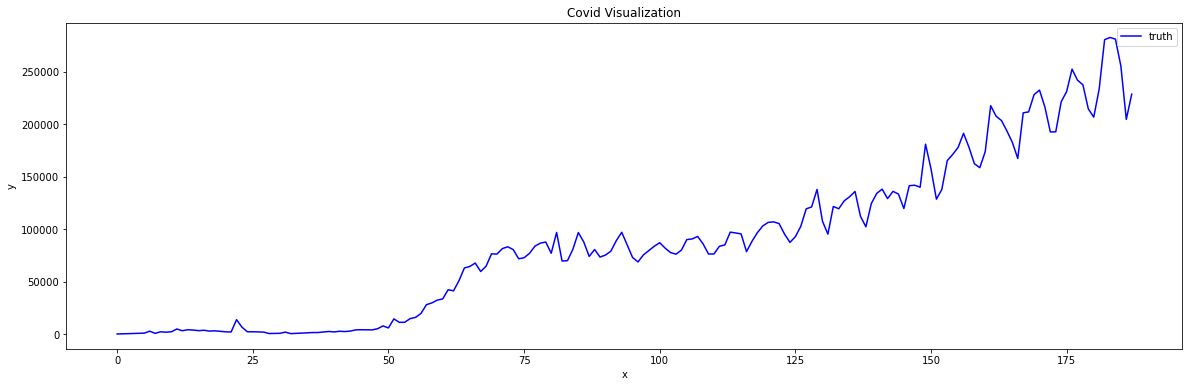

In [55]:
plot_graph(df.index.values.tolist(), Y)

In [56]:
new_cases = df['New cases']
df = df.drop(['Date', 'New cases'], axis=1)

In [57]:
X = df.to_numpy()
Y = new_cases.to_numpy()
# X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), new_cases.to_numpy() , test_size=50, random_state=42)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [76]:
N = 50
X_train,y_train = X[:-N], Y[:-N]
X_test, y_test = X[len(X) - N - 1:-1], Y[len(Y) -N - 1:-1]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(138, 10) (138,)
(50, 10) (50,)


# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)
print(lin_reg.score(X_test, y_test))
lin_reg.predict(X_test)

0.20044118411100942


array([122335.08025006, 142231.73166971, 134925.73459705, 137575.86448314,
       139608.86510414, 138848.81158889, 142438.5396316 , 139705.08779387,
       144009.27560483, 162107.04905018, 160206.58535419, 154615.18107973,
       166397.06889295, 164890.48043602, 157538.31343107, 163323.6072391 ,
       175829.24657177, 180821.1293885 , 185502.94220987, 186045.47211549,
       188972.74155805, 184864.52126552, 192517.73677981, 205840.84993781,
       211426.64763658, 242043.59872559, 212573.67582651, 227935.32014333,
       213778.67400038, 219124.48806845, 236358.61664389, 239264.27716902,
       241062.01442934, 247415.3280551 , 248869.4244232 , 247724.4136254 ,
       256874.52388287, 269521.57180718, 277060.5792723 , 283255.04987557,
       293281.05220083, 292588.4791494 , 281810.152261  , 300246.38746557,
       315408.13315178, 325249.62284206, 341024.04537625, 341568.45146905,
       338280.3917067 , 323510.0920799 ])

In [51]:
# weight matrix
lin_reg.coef_

array([-1.15631603e-01, -4.36183263e-01,  1.35531764e-01,  1.85017877e-01,
        4.03788215e+00,  1.97929510e-01, -1.65314168e+03, -2.86558108e+02,
       -1.22361256e+01,  1.86533466e+02])

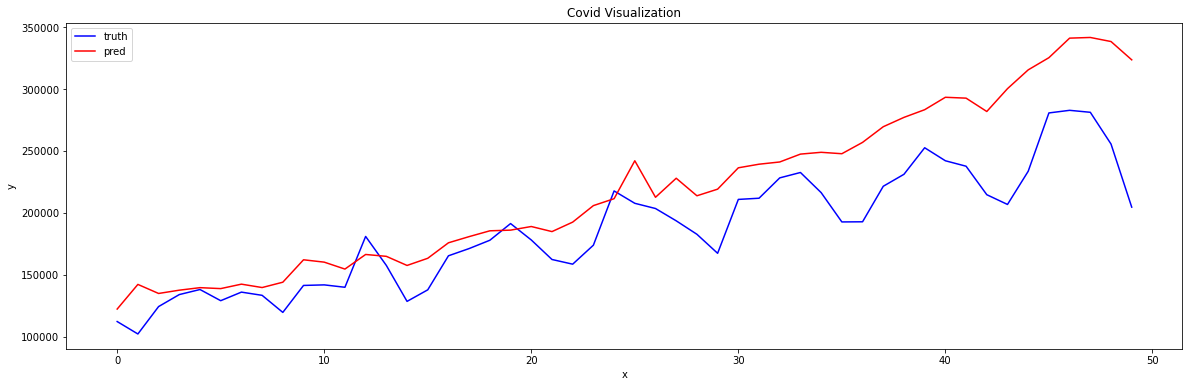

In [130]:
plot_graph(x=np.arange(N), y=y_test, y2=lin_reg.predict(X_test), compare=True)

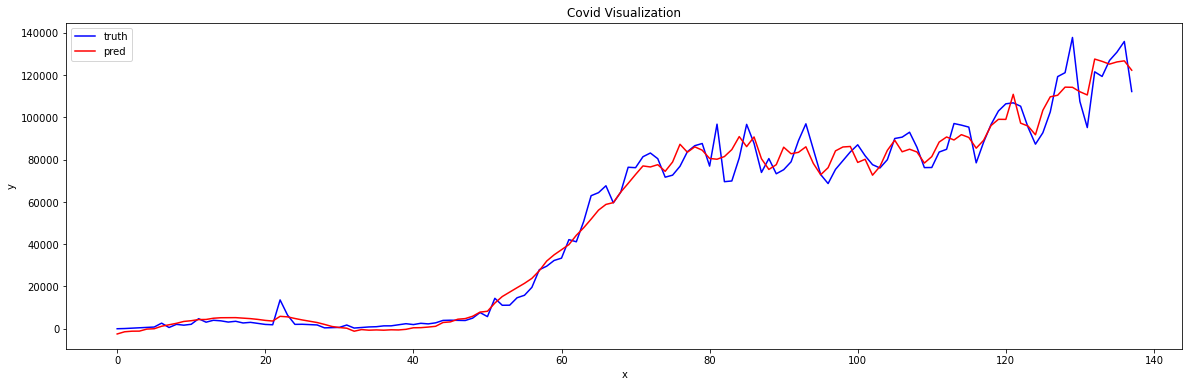

In [131]:
plot_graph(x=np.arange(len(df) - N), y=y_train, y2=lin_reg.predict(X_train), compare=True)

## Random Forest Regression

In [132]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=5)
regressor.fit(X_train, y_train)
regressor.predict(X_test)
regressor.score(X_test, y_test)

-2.0511427582151747

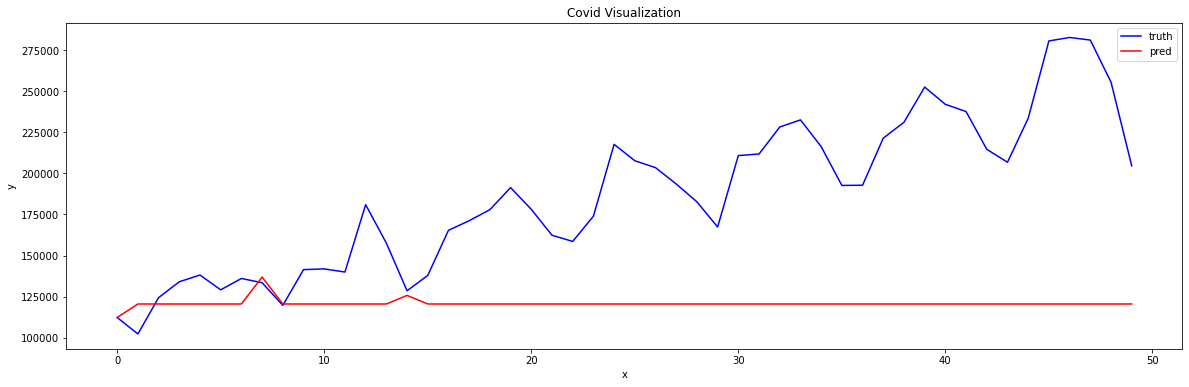

In [118]:
plot_graph(x=np.arange(N), y=y_test, y2=regressor.predict(X_test), compare=True)

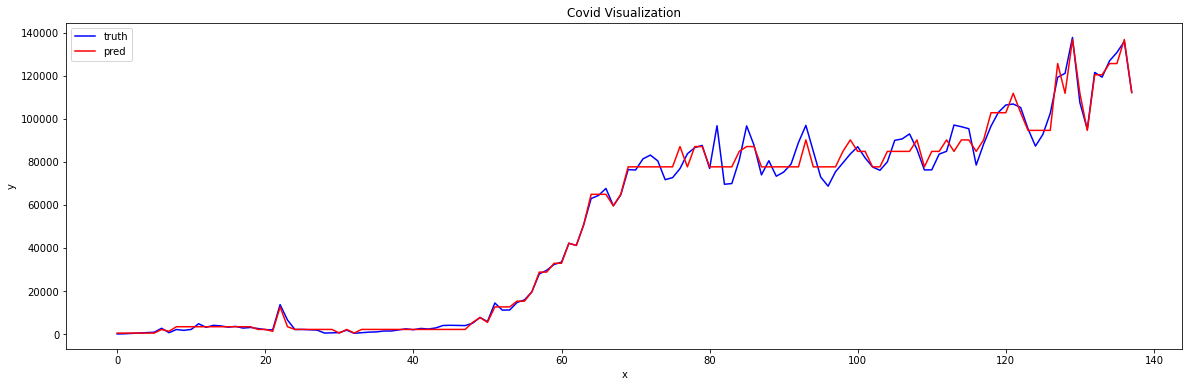

In [120]:
plot_graph(x=np.arange(len(df) - N), y=y_train, y2=regressor.predict(X_train), compare=True)

## Gradient Boosting Regressor

In [123]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
X, y = make_regression(random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

reg.predict(X_test)
reg.score(X_test, y_test)


-2.2174446682484614

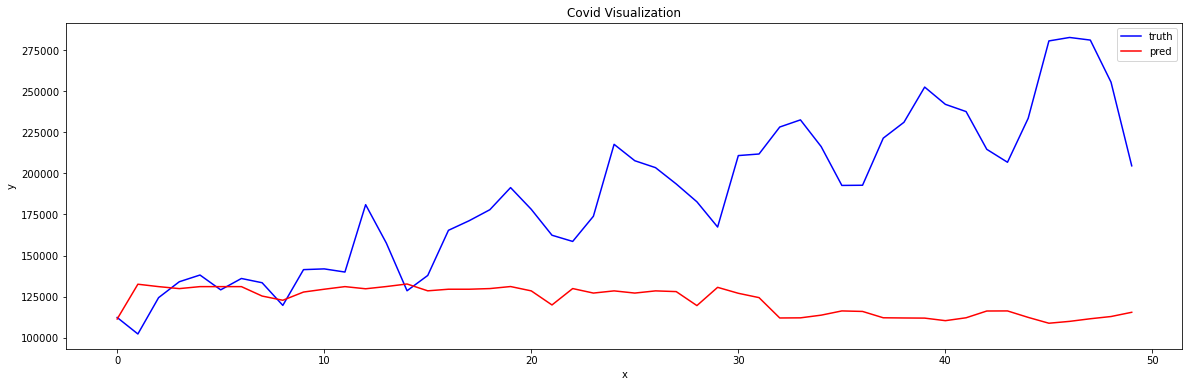

In [108]:
plot_graph(x=np.arange(N), y=y_test, y2=reg.predict(X_test), compare=True)

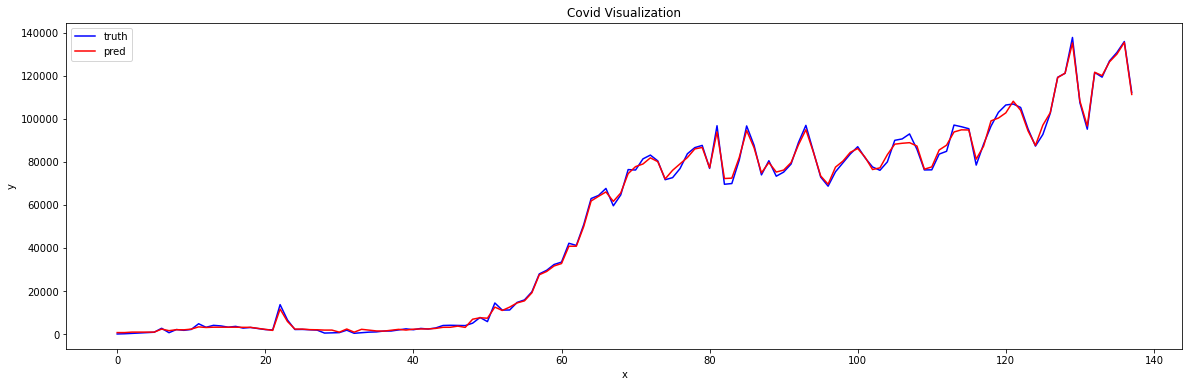

In [121]:
plot_graph(x=np.arange(len(df) - N), y=y_train, y2=reg.predict(X_train), compare=True)

In [60]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train, axis=0, norm='max')

print(np.mean(X_train, axis=1).shape)
print(np.var(X_train, axis=1).shape)

(138,)
(138,)


In [77]:
len(X_test)

50

# RNN Implementation

In [61]:
m = nn.Tanh()
soft_max = nn.Softmax(dim=1)

class RNN(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_days=138, embedding_size=10, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)   
        self.rnn_to_logits = nn.Linear(rnn_num_units, embedding_size)          
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, int64[batch_size]
        :param h_prev: previous rnn hidden states, float32 matrix [batch, rnn_num_units]
        """
        # get vector embedding of x
        #x_emb = self.embedding(x)
        #print("x_emb:", x_emb.shape)
        
        h_next = torch.cat((h_prev, x), dim=1)
        #print("concat: ", h_next.shape)
        
        h_next = m(h_next @ self.rnn_update.weight.T)
        #print("h_next", h_next.shape)
        
        #compute logits for next character probs
        logits = h_next @ self.rnn_to_logits.weight.T
        #print("logits", F.log_softmax(logits, -1).shape)
 
        return h_next, logits
    
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units)

In [62]:
rnn = RNN()

batch_ix = torch.tensor(X_train ,dtype=torch.int64)
batch_ix  = torch.unsqueeze(batch_ix , 0)
print("batch: ", batch_ix.shape)

# get "name" matrix size
batch_size, max_length, num_features = batch_ix.size()
print("\nbatch_size, max_length, num_features: ", batch_size, max_length, num_features)

# get h0 state
hid_state = rnn.initial_state(batch_size)
print("\ninitial hidden state: ", hid_state.shape)

print("\nrnn update: ", rnn.rnn_update.weight.shape)

print("\nto_logits: ", rnn.rnn_to_logits.weight.shape)

# pass xt to RNN
for x_t in batch_ix.transpose(0,1):      # why transpose?
    print("\nht-1: ", hid_state.shape)
    print("xt: ", x_t.shape)
    emb = rnn(x_t, hid_state)
    print("rnn update: ", rnn.rnn_update.weight.shape)
    print("logits", emb[1].shape)
    break

batch:  torch.Size([1, 138, 10])

batch_size, max_length, num_features:  1 138 10

initial hidden state:  torch.Size([1, 64])

rnn update:  torch.Size([64, 74])

to_logits:  torch.Size([10, 64])

ht-1:  torch.Size([1, 64])
xt:  torch.Size([1, 10])
rnn update:  torch.Size([64, 74])
logits torch.Size([1, 10])


In [154]:
batch_ix.transpose(0,1).shape


    
    print("batch: ", batch_ix.shape)

torch.Size([138, 1, 10])

## Calculate Loss

In [63]:
def rnn_loop(rnn, batch_ix):
    
    """
    Computes log P(next_character) for all time-steps in lines_ix
    :param lines_ix: an int32 matrix of shape [batch, time], output of to_matrix(lines)
    """  
    
    batch_size, max_length, num_features = batch_ix.size()
    hid_state = rnn.initial_state(batch_size)
    preds = []

    for x_t in batch_ix.transpose(0,1):
        hid_state, pred_next = rnn(x_t, hid_state)  # <-- here we call your one-step code
        preds.append(pred_next)
        #print(hid_state)
    return torch.stack(preds, dim=1)


batch_ix = torch.tensor(X_train ,dtype=torch.int64)
batch_ix  = torch.unsqueeze(batch_ix , 0)
preds = rnn_loop(rnn, batch_ix)
print(len(preds))
preds.shape

1


torch.Size([1, 138, 10])

In [202]:
print(preds.shape)
print(batch_ix.shape)

torch.Size([1, 138, 10])
torch.Size([1, 138, 10])


In [64]:
MSE = nn.MSELoss()
preds = torch.squeeze(preds)
batch_ix = torch.squeeze(batch_ix)
output = MSE(preds, batch_ix)
output

tensor(0.0276, grad_fn=<MseLossBackward>)

## Training Loop

In [200]:
batch_ix[:, 1:].shape

torch.Size([138, 9])

In [199]:
preds[:, :-1].shape

torch.Size([138, 9])

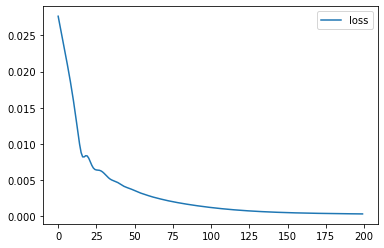

In [65]:
from IPython.display import clear_output
opt = torch.optim.Adam(rnn.parameters())
history = []
MSE = nn.MSELoss()

for i in range(200):
    
    batch_ix = torch.tensor(X_train ,dtype=torch.int64)
    batch_ix  = torch.unsqueeze(batch_ix , 0).float()
    
    preds = rnn_loop(rnn, batch_ix).float()  # get log_P's for batch
    
    preds = torch.squeeze(preds)
    batch_ix = torch.squeeze(batch_ix)
    
    loss = MSE(batch_ix, preds)
    
    # train with backprop  <YOUR CODE>
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        print(loss)
        clear_output(True)
        plt.plot(history, label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

In [66]:
MAX_LENGTH = 138 

def generate_sample(rnn, seed_vectors, max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = torch.tensor(seed_vectors, dtype=torch.float)
    #x_sequence = torch.unsqueeze(x_sequence, -1)
    print("actual seq: ", x_sequence.shape)
    hid_state = rnn.initial_state(batch_size=1)
    flag = 0
    
    #feed the seed phrase, if any
    for i in range(len(seed_vectors) - 1):
        flag = 1
        if i == 0:
            x_sequence = torch.unsqueeze(x_sequence, 0)
        #print("x_seq", x_sequence[:, i].shape)
        hid_state, _ = rnn(x_sequence[:, i], hid_state)
    
    if flag == 1:
        x_sequence = torch.squeeze(x_sequence, 0)
    
    #start generating
    print("start x_seq", x_sequence.shape)
    for _ in range(max_length - len(seed_vectors)):
        x_sequence = torch.unsqueeze(x_sequence, 0)
        #print("\nx_seq", x_sequence[:, -1].shape)
        hid_state, pred_next = rnn(torch.tensor(x_sequence[:,-1]), hid_state)
        #print("hid_state", hid_state.shape)
        #print("pred_next", pred_next.shape)
        #print("full x_seq",x_sequence.shape)
        #print(torch.squeeze(x_sequence, axis=0).shape)
        
        x_sequence = torch.cat([torch.squeeze(x_sequence, axis=0), pred_next], dim=0)
        #print("final seq", x_sequence.shape)
     
    #print("finish")
    return x_sequence

kk = generate_sample(rnn, X_train[0:10], max_length=138)

actual seq:  torch.Size([10, 10])
start x_seq torch.Size([10, 10])


<ipython-input-66-404596ec4858>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hid_state, pred_next = rnn(torch.tensor(x_sequence[:,-1]), hid_state)


## Train Data

## Test Data

In [109]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
print(train.shape, test.shape)

(124, 10) (64, 10)


actual seq:  torch.Size([124, 10])
start x_seq torch.Size([124, 10])
(188,)


<ipython-input-66-404596ec4858>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hid_state, pred_next = rnn(torch.tensor(x_sequence[:,-1]), hid_state)


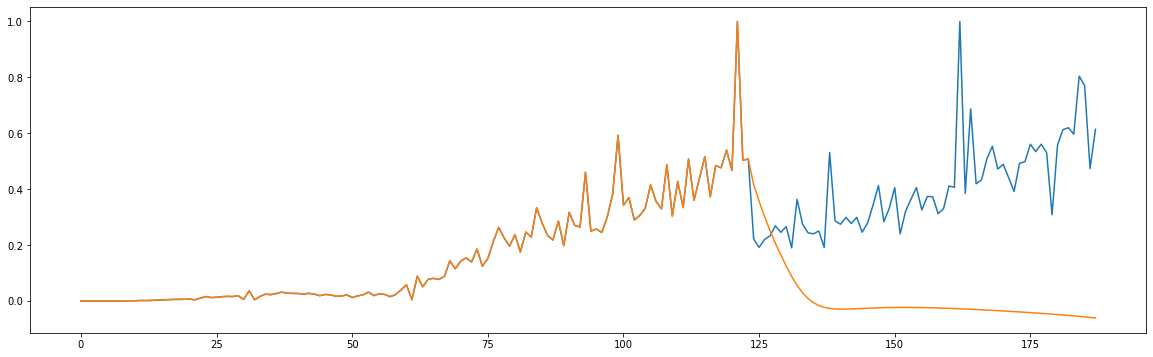

In [118]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (20,6))
row = 5

X_test = normalize(test, axis=0, norm='max')
X_train = normalize(train, axis=0, norm='max')

#preds = rnn_loop(rnn, batch_ix).float()  # get log_P's for batch
preds = generate_sample(rnn, X_train, max_length=188)[:, row].detach().numpy()

print(preds.shape)
plt.plot(np.concatenate((X_train[:, row], X_test[:, row])))
plt.plot(preds)

plt.show()

actual seq:  torch.Size([124, 10])
start x_seq torch.Size([124, 10])
(188,)


<ipython-input-66-404596ec4858>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hid_state, pred_next = rnn(torch.tensor(x_sequence[:,-1]), hid_state)


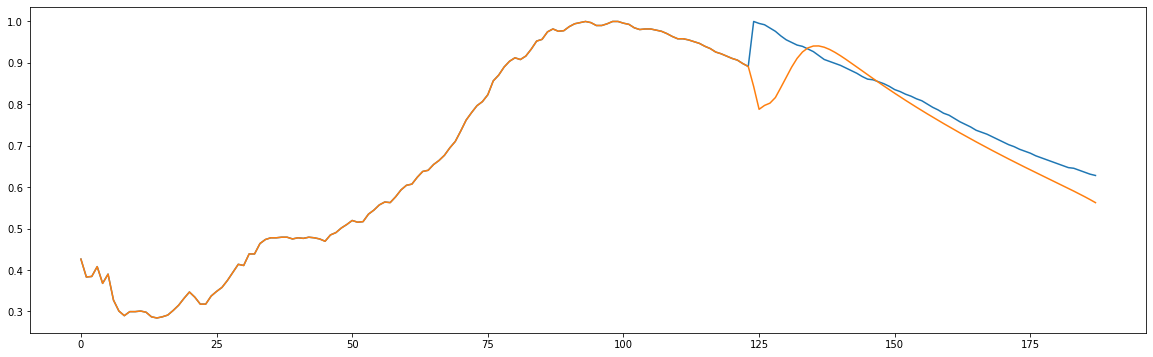

In [123]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (20,6))
row = 6

X_test = normalize(test, axis=0, norm='max')
X_train = normalize(train, axis=0, norm='max')

#preds = rnn_loop(rnn, batch_ix).float()  # get log_P's for batch
preds = generate_sample(rnn, X_train, max_length=188)[:, row].detach().numpy()

print(preds.shape)
plt.plot(np.concatenate((X_train[:, row], X_test[:, row])))
plt.plot(preds)

plt.show()

actual seq:  torch.Size([101, 10])
start x_seq torch.Size([101, 10])


<ipython-input-66-404596ec4858>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hid_state, pred_next = rnn(torch.tensor(x_sequence[:,-1]), hid_state)


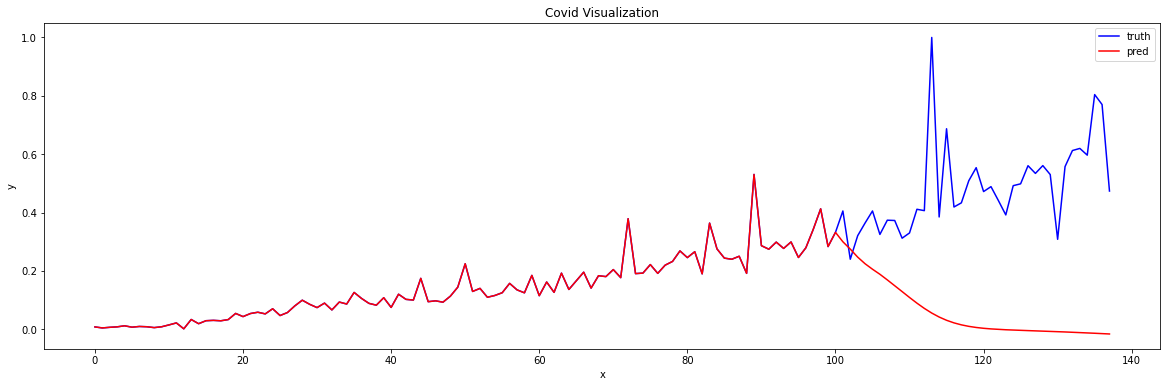

In [107]:
N = 138
days_analyzed = 101
row = 5

X_test, y_test = X[len(X) - N - 1:-1], Y[len(Y) -N - 1:-1]
X_test = normalize(X_test, axis=0, norm='max')

#preds = rnn_loop(rnn, batch_ix).float()  # get log_P's for batch
preds = generate_sample(rnn, X_test[:days_analyzed], max_length=138)[:, row].detach().numpy()

true_ = X_test[:, row]
plot_graph(x=np.arange(138), y=true_, y2=preds, compare=True)

actual seq:  torch.Size([10, 10])
start x_seq torch.Size([10, 10])


<ipython-input-403-404596ec4858>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hid_state, pred_next = rnn(torch.tensor(x_sequence[:,-1]), hid_state)


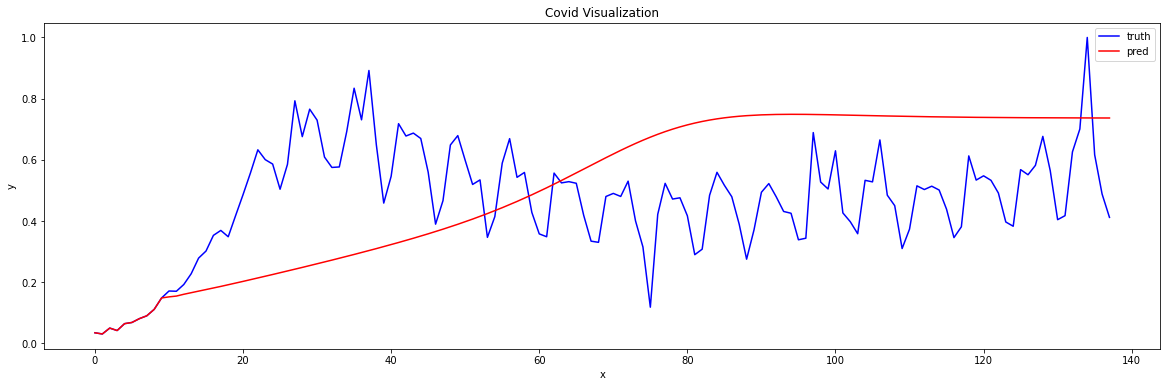

In [441]:
N = 138
days_analyzed = 10
row = 4

X_test, y_test = X[len(X) - N - 1:-1], Y[len(Y) -N - 1:-1]
X_test = normalize(X_test, axis=0, norm='max')

#preds = rnn_loop(rnn, batch_ix).float()  # get log_P's for batch
preds = generate_sample(rnn, X_test[:days_analyzed], max_length=138)[:, row].detach().numpy()

true_ = X_test[:, row]
plot_graph(x=np.arange(138), y=true_, y2=preds, compare=True)

## Infrence on just Logits

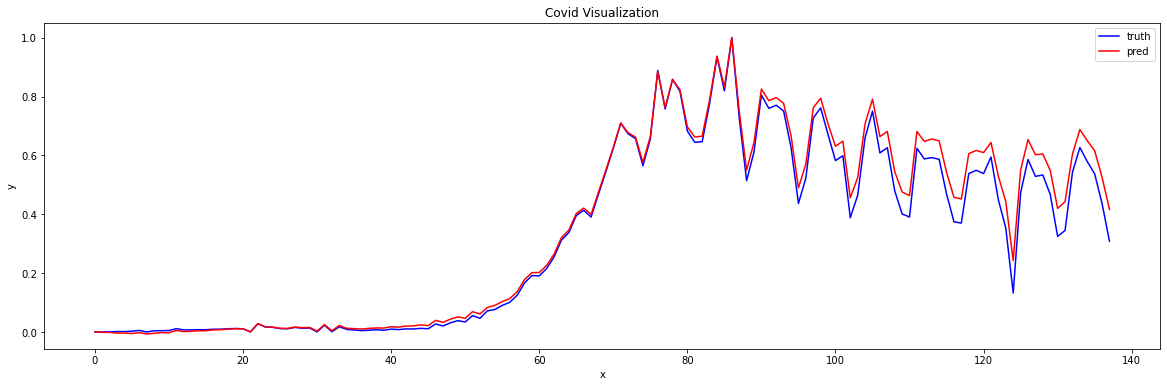

In [273]:
batch_ix = torch.tensor(X_train ,dtype=torch.float)
batch_ix = torch.unsqueeze(batch_ix , 0)
    
preds = rnn_loop(rnn, batch_ix).float()  # get log_P's for batch
    
preds = torch.squeeze(preds)
batch_ix = torch.squeeze(batch_ix)

row = 4
pred_deaths = preds[:, row].detach().numpy()
true_deaths = batch_ix[:, row].detach().numpy()
plot_graph(x=np.arange(138), y=true_deaths, y2=pred_deaths, compare=True)

[TODO]
- train/eval/tes
- look at correlation matrix on Linear Regression
        - make conclusion
- SIR hyperparamters!!
    - make conclusion
- ARIMA, facebook prophet

- Problems:
    - not enough data with lots of noise
    - have use models with little paramters